# Image Classification using VGG16

## Based on VGG16 calssification

In [19]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16




Populating the interactive namespace from numpy and matplotlib


In [20]:
def show_img(img_path):
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()

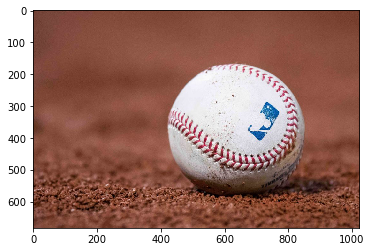

baseball (99.98%)


In [21]:

# load the model
model = VGG16()
# load an image from file
image = load_img('images/balls/b3.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
show_img('images/balls/b3.jpg')
print('%s (%.2f%%)' % (label[1], label[2]*100))


## Based on the 9 calsses

In [22]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers


In [11]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [12]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x13803bcc0> False
<keras.layers.convolutional.Conv2D object at 0x13803bd30> False
<keras.layers.convolutional.Conv2D object at 0x13803be10> False
<keras.layers.pooling.MaxPooling2D object at 0x137fe9898> False
<keras.layers.convolutional.Conv2D object at 0x137fe91d0> False
<keras.layers.convolutional.Conv2D object at 0x138007e10> False
<keras.layers.pooling.MaxPooling2D object at 0x13b044b00> False
<keras.layers.convolutional.Conv2D object at 0x13b0446d8> False
<keras.layers.convolutional.Conv2D object at 0x13b055390> False
<keras.layers.convolutional.Conv2D object at 0x13b068ba8> False
<keras.layers.pooling.MaxPooling2D object at 0x1396f3a90> False
<keras.layers.convolutional.Conv2D object at 0x1396f3668> False
<keras.layers.convolutional.Conv2D object at 0x139708320> False
<keras.layers.convolutional.Conv2D object at 0x13971eb38> False
<keras.layers.pooling.MaxPooling2D object at 0x139733b00> False
<keras.layers.convolutional.Conv2D obj

In [13]:

 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 9225      
Total params: 40,415,049
Trainable params: 32,779,785
Non-trainable params: 7,635,264
_________________________________________________________________


In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        'images/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 173 images belonging to 9 classes.
Found 55 images belonging to 9 classes.


In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=16,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/16
2/1 [==================================] - 44s 22s/step - loss: 3.8314 - acc: 0.1040 - val_loss: 3.0379 - val_acc: 0.2364
Epoch 2/16
2/1 [==================================] - 41s 21s/step - loss: 2.4525 - acc: 0.1387 - val_loss: 2.3086 - val_acc: 0.4182
Epoch 3/16
2/1 [==================================] - 41s 21s/step - loss: 1.8976 - acc: 0.3410 - val_loss: 2.4086 - val_acc: 0.5273
Epoch 4/16
2/1 [==================================] - 40s 20s/step - loss: 1.2678 - acc: 0.6069 - val_loss: 1.2920 - val_acc: 0.7455
Epoch 5/16
2/1 [==================================] - 39s 19s/step - loss: 0.8599 - acc: 0.7225 - val_loss: 1.4616 - val_acc: 0.6364
Epoch 6/16
2/1 [==================================] - 37s 19s/step - loss: 1.2554 - acc: 0.5723 - val_loss: 2.7751 - val_acc: 0.6727
Epoch 7/16
2/1 [==================================] - 39s 19s/step - loss: 0.6332 - acc: 0.7688 - val_loss: 1.3549 - val_acc: 0.7818
Epoch 8/16
2/1 [==================================] - 40s 20s/step - 

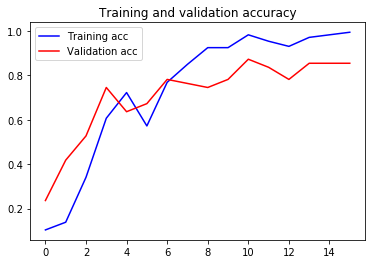

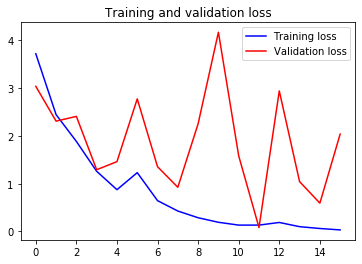

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [25]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        'images/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format('images/valid',fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

Found 55 images belonging to 9 classes.
6/5 [================================] - 8s 1s/step
No of errors = 55/55


KeyError: 669